In [1]:
# imports
import os
import json
import graphviz

In [2]:
# set paths for .json file with taxonomy information and .png of taxonomy
data_dir = "local_data"
data_path = os.path.join(os.getcwd(), data_dir)
if not os.path.isdir(data_dir):
    os.makedirs(data_dir)

json_filename = "example_miso_taxonomy.json"
json_filepath = os.path.join(data_dir, json_filename)

dot_filename = "example_miso_taxonomy"
dot_filepath = os.path.join(data_dir, dot_filename)

In [3]:
# store each node and its relationship with other nodes in a dict
list_dicts = []
list_dicts.append({"name": "sounds", "label": "Sounds", "parents": []})
list_dicts.append({"name": "human", "label": "Human", "parents": ["sounds"]})
list_dicts.append({"name": "nature", "label": "Nature", "parents": ["sounds"]})
list_dicts.append({"name": "mechanical", "label": "Mechanical", "parents": ["sounds"]})
list_dicts.append({"name": "music", "label": "Music", "parents": ["sounds"]})
list_dicts.append({"name": "oral_nasal", "label": "Oral/nasal", "parents": ["human"]})
list_dicts.append({"name": "hands_arms", "label": "Hands/arms", "parents": ["human"]})
list_dicts.append({"name": "feet_legs", "label": "Feet/legs", "parents": ["human"]})
list_dicts.append({"name": "animal", "label": "Animal", "parents": ["nature"]})
list_dicts.append({"name": "nonanimal", "label": "Non-animal", "parents": ["nature"]})
list_dicts.append(
    {"name": "humming", "label": "Humming", "parents": ["oral_nasal", "music"]}
)
list_dicts.append({"name": "tapping", "label": "Tapping", "parents": ["feet_legs"]})
nest_dict = {}
for each_dict in list_dicts:
    nest_dict[each_dict["name"]] = {keep_key: each_dict[keep_key] for keep_key in each_dict.keys() if "name" not in keep_key}

In [4]:
# write to .json file
with open(json_filepath, "w") as fout:
    json.dump(nest_dict, fout, indent=4)
# read from .json file
with open(json_filepath, "r") as read_file:
    data = json.load(read_file)

In [5]:
# list of categories (indicated by an ellipse)
cat_list = [
    "sounds",
    "human",
    "nature",
    "mechanical",
    "music",
    "oral_nasal",
    "hands_arms",
    "feet_legs",
    "animal",
    "nonanimal",
]

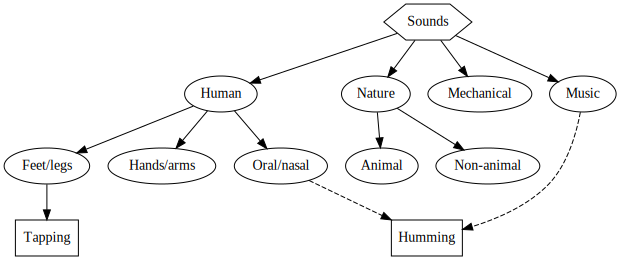

In [6]:
# draw taxonomy
dot = graphviz.Digraph("taxonomy", comment="Taxonomy")
for key, value in data.items():
    if key == "sounds":
        dot.node(key, value["label"], shape="hexagon")
    elif key in cat_list:
        dot.node(key, value["label"], shape="ellipse")
    else:
        dot.node(key, value["label"], shape="box")

for key, value in data.items():
    for parent in value["parents"]:
        if len(value["parents"]) > 1:
            dot.edge(parent, key, style="dashed")
        else:
            dot.edge(parent, key)
# save PDF
dot.render(dot_filepath, view=False)
dot_filepath
# show in notebook
dot